# Pandas Practice with Pokemon

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from env import host, user, password
pokemon = pd.read_csv('pokemon.csv')

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#rename columns for syntactically corect python
pokemon = pokemon.rename(columns={'Type 1':'type_one', 'Type 2': 'type_two', 'Sp. Atk': 'sp_atk', 'Sp. Def': 'sp_def'})

In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   type_one    800 non-null    object
 3   type_two    414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   sp_atk      800 non-null    int64 
 9   sp_def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


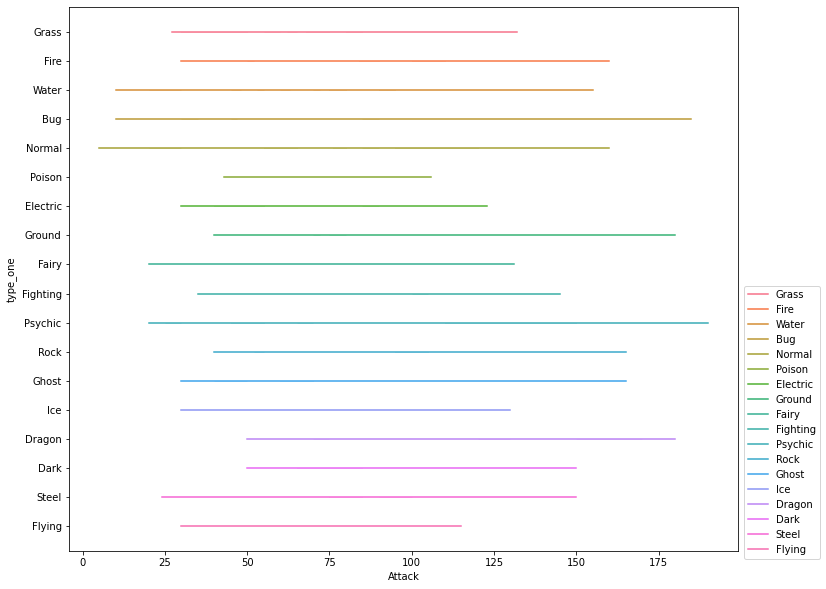

In [6]:
#Create a lineplot to show pokemon attack by type
plt.figure(figsize=(12,10))
sns.lineplot(data=pokemon, y="type_one", x="Attack", hue="type_one")


plt.legend(bbox_to_anchor=(1, .5),
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [7]:
#What is the pokemon with the greatest HP

pokemon.Name[pokemon.HP.nlargest(keep='all')]

255    Tyrogue
250     Phanpy
190    Togetic
170    Quilava
165        Mew
Name: Name, dtype: object

In [8]:
#Find the Grass type pokemon with the greatest HP 
grass_pokemon = pokemon[pokemon.type_one.str.contains("Grass")]
grass_pokemon[grass_pokemon.HP == grass_pokemon.HP.max()]

,#,Name,type_one,type_two,Total,HP,Attack,Defense,sp_atk,sp_def,Speed,Generation,Legendary
741,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False


In [9]:
#Find the pokemon with the strongest attack but lowest defense
pokemon[(pokemon.Attack == pokemon.Attack.max()) & (pokemon.Defense >= pokemon.Defense.min())]

,#,Name,type_one,type_two,Total,HP,Attack,Defense,sp_atk,sp_def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [10]:
#find the average defense for pokemon by type
pk_defense_by_type = pokemon.groupby('type_one').Defense.mean()

pk_defense_by_type

type_one
Bug          70.724638
Dark         70.225806
Dragon       86.375000
Electric     66.295455
Fairy        65.705882
Fighting     65.925926
Fire         67.769231
Flying       66.250000
Ghost        81.187500
Grass        70.800000
Ground       84.843750
Ice          71.416667
Normal       59.846939
Poison       68.821429
Psychic      67.684211
Rock        100.795455
Steel       126.370370
Water        72.946429
Name: Defense, dtype: float64

In [11]:
#what pokemon has the strongest attack?
pokemon[pokemon.Attack == pokemon.Attack.max()]

,#,Name,type_one,type_two,Total,HP,Attack,Defense,sp_atk,sp_def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


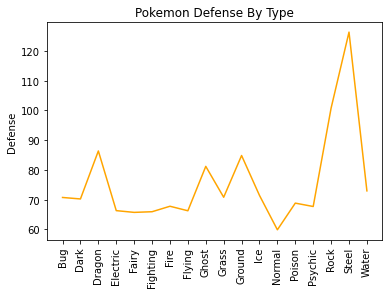

In [12]:
plt.plot(pk_defense_by_type, color='orange')
plt.xticks(rotation='vertical')
plt.title('Pokemon Defense By Type')
plt.ylabel("Defense")
plt.show()

<AxesSubplot:xlabel='Defense', ylabel='Attack'>

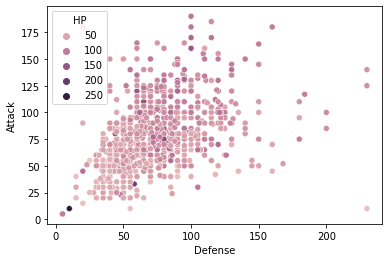

In [16]:
#Is HP dependent on stronger attack and stronger defense?
sns.scatterplot(data=pokemon,x="Defense", y="Attack", hue="HP")